In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#beispiel übung

df = pd.read_csv("../data/Library_Usage.csv")
df['Age Range'].value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [5]:
df['Age Range'].value_counts(normalize=True)

25 to 34 years       0.215208
35 to 44 years       0.159227
10 to 19 years       0.139271
45 to 54 years       0.124026
0 to 9 years         0.090357
65 to 74 years       0.071216
20 to 24 years       0.070318
55 to 59 years       0.050161
60 to 64 years       0.046783
75 years and over    0.033433
Name: Age Range, dtype: float64

In [10]:
age_mode = df['Age Range'].mode()
age_mode[0]

'25 to 34 years'

# 3.1 Häufigkeiten

In [22]:
print(df['Year Patron Registered'].value_counts())
# 3.1.1 in Jahr 2003 : 16.3 %
# von 2004 bis 2012 : relative wenige Kunden registriert
# ab 2013: Registedred Patron Anzahl steigert langsam

2003    69257
2015    53951
2014    51902
2013    48251
2012    37395
2011    26531
2016    26288
2010    24321
2009    22307
2008    20518
2007    13289
2006    10776
2005     9668
2004     8994
Name: Year Patron Registered, dtype: int64


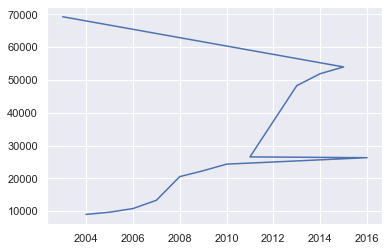

In [38]:
plt.plot(df['Year Patron Registered'].value_counts()) # ????ß

(array([78251.,  9668., 10776., 33807., 22307., 24321., 63926., 48251.,
        51902., 80239.]),
 array([2003. , 2004.3, 2005.6, 2006.9, 2008.2, 2009.5, 2010.8, 2012.1,
        2013.4, 2014.7, 2016. ]),
 <a list of 10 Patch objects>)

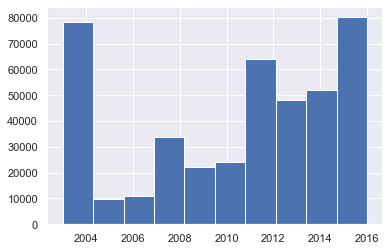

In [34]:
plt.hist(df['Year Patron Registered'])

In [14]:
df['Age Range'].value_counts(normalize=True)
# 3.1.2 :  25 - 34 : 21.5%

25 to 34 years       0.215208
35 to 44 years       0.159227
10 to 19 years       0.139271
45 to 54 years       0.124026
0 to 9 years         0.090357
65 to 74 years       0.071216
20 to 24 years       0.070318
55 to 59 years       0.050161
60 to 64 years       0.046783
75 years and over    0.033433
Name: Age Range, dtype: float64

In [33]:
age = df['Age Range'].fillna(0) 
# 3.1.3 ich finde nicht gut, da es verwirrung  mit "0 to 9 years"kommen könnte. 


In [34]:
age.value_counts()
#df['Age Range'].unique()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
0                      215
Name: Age Range, dtype: int64

In [23]:
age.describe()

count             423448
unique                11
top       25 to 34 years
freq               91083
Name: Age Range, dtype: object

In [36]:
#3.1.4  ich würde nicht mit 0 ersetzen. eher "NaN"  oder  methode dropna() netzen
age = df['Age Range'].fillna('NaN')
age.value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
NaN                    215
Name: Age Range, dtype: int64

# 3.2 Mittelwert und Median
mean: 161.98 (mittelwert von allen Werten)
maddian: 19.0  (mittelwert von  211724 ste und 211725 ste  Werten)
count: 422448
Median Wert ist noch besser zum Statistik.  Extrem größere Werte oder kleine Werte nicht beeibflussen  werden.  

In [37]:
df['Total Checkouts'].mean()

161.98209697530748

In [38]:
df['Total Checkouts'].median()

19.0

In [41]:
df['Total Checkouts'].count()

423448

# 3.3 Quantile

In [42]:
df['Total Checkouts'].quantile(q=[0.25, 0.5, 0.75])

0.25      2.0
0.50     19.0
0.75    113.0
Name: Total Checkouts, dtype: float64

In [43]:
alpha = 0.005
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.005       0.00
0.995    2827.53
Name: Total Checkouts, dtype: float64

In [44]:
alpha =0.0015
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.0015       0.0000
0.9985    4286.8295
Name: Total Checkouts, dtype: float64

In [45]:
df['Total Checkouts'].quantile(q=[0.25, 0.5,0.995, 0.9985])

0.2500       2.0000
0.5000      19.0000
0.9950    2827.5300
0.9985    4286.8295
Name: Total Checkouts, dtype: float64

In [70]:
637*100/423448
#0.15% Ausreißer Teil

0.15043169409230886

In [49]:
# als  totalcheckouts< 4286.8,  
422811 (637( Ausreißer mit mehr 4286 checkouts)weniger )
##
df_TCless4286 = (df['Total Checkouts'] < 4286)
df.loc[df_TCless4286]


,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015,p,phone,False,2009,False,9.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0


# 3.4 Varianz

"total Renewals" (variationskoeffizienten 3.7717062851167245)  streut mehr als "total Checkouts" (variationskoeffizienten 2.8009495298130904)


In [53]:
TCvar = df['Total Checkouts'].var()
TRvar = df["Total Renewals"].var()
print(TCvar)
print(TRvar)

205847.027758416
50629.46272559851


In [54]:
TCstd = df['Total Checkouts'].std()
TRstd = df["Total Renewals"].std()
print(TCstd)
print(TRstd)

453.7036783611259
225.0099169494503


In [57]:
TCmean=df["Total Checkouts"].mean()
TRmean = df["Total Renewals"].mean()
print(TCstd/TCmean)
print(TRstd/TRmean)

2.8009495298130904
3.7717062851167245


In [58]:
df['Total Checkouts'].max() - df['Total Checkouts'].min()

35907

In [59]:
df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25)

111.0

# 3.5 Ausreißerentfernung 
 Ausreißer mit Total Chackouts mehr als 279.5

In [61]:
q75 = df['Total Checkouts'].quantile(q=0.75) 
q25 = df['Total Checkouts'].quantile(q=0.25)
ausreisser = q75 + 1.5*(q75-q25)
print(ausreisser)


279.5


In [62]:
df_TC = (df['Total Checkouts'] < 279.2)
df.loc[df_TC]

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423440,2,YOUNG ADULT,42,53,10 to 19 years,M4,Merced,June,2014,p,phone,False,2011,True,NaN
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0


In [66]:
#363702 : TC <279.5, total df: 423448
(423448-363702)*100/423448
# 85.89 % nicht- Ausreißer,  14.109% Ausreißer (59746). 

14.109406585932629